In [45]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [46]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0333(a)(test_pattern_blurring_orig).tif")
img = np.asarray(img)

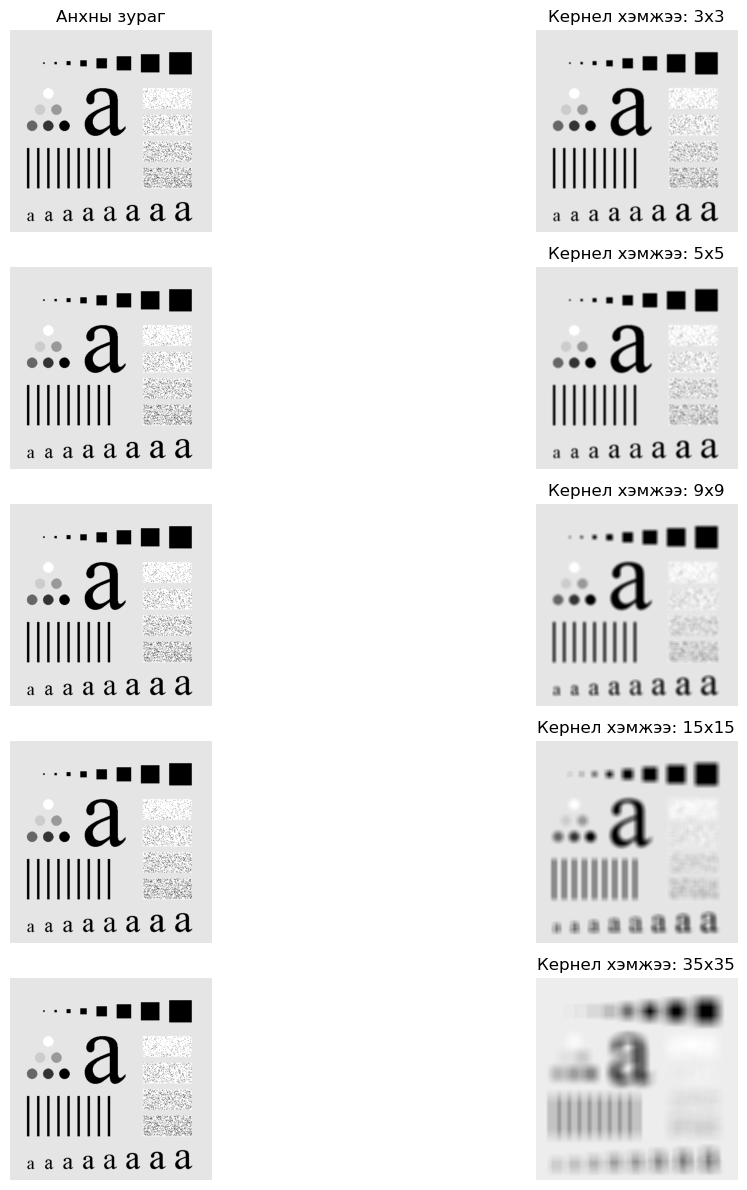

In [47]:
kernel_sizes = [3, 5, 9, 15, 35]

num_rows = len(kernel_sizes)
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize = (14, 12))

for i, kernel_size in enumerate(kernel_sizes):
    kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / (kernel_size ** 2)
    smoothed_image = cv2.filter2D(img, -1, kernel)

    axes[i, 0].imshow(img, cmap = 'gray')
    if i == 0:
        axes[i, 0].set_title('Анхны зураг')

    axes[i, 1].imshow(smoothed_image, cmap='gray')
    axes[i, 1].set_title(f'Кернел хэмжээ: {kernel_size}x{kernel_size}')

    axes[i, 0].axis('off')
    axes[i, 1].axis('off')


plt.tight_layout()
plt.show()
fig.savefig("./plots/smoothing_1.png", dpi = 300)

In [48]:
def smooth_img(img, kernel_size):
    height, width = img.shape
    kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / (kernel_size ** 2)
    smoothed_image = np.zeros((height, width), dtype = np.float32)

    kernel_iter = kernel_size // 2
    for i in range(kernel_iter, height - kernel_iter):
        for j in range(kernel_iter, width - kernel_iter):
            neighborhood = img[i - kernel_iter: i + kernel_iter + 1, j - kernel_iter: j + kernel_iter + 1]

            smoothed_pixel = np.sum(neighborhood * kernel)
            smoothed_image[i, j] = smoothed_pixel
    
    return smoothed_image

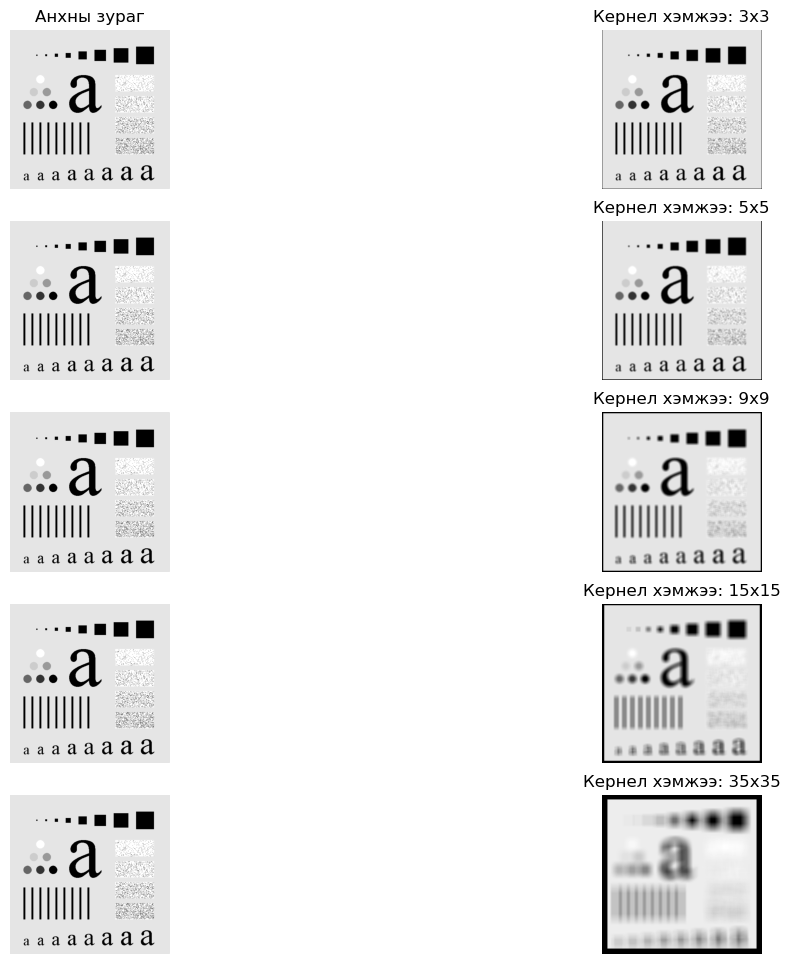

In [49]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0333(a)(test_pattern_blurring_orig).tif")
img = np.asarray(img)

kernel_sizes = [3, 5, 9, 15, 35]
num_rows = len(kernel_sizes)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize = (14, 12))

for i, kernel_size in enumerate(kernel_sizes):
    smoothed_image = smooth_img(img, kernel_size)

    axes[i, 0].imshow(img, cmap = 'gray')
    if i == 0:
        axes[i, 0].set_title('Анхны зураг')

    axes[i, 1].imshow(smoothed_image, cmap='gray')
    axes[i, 1].set_title(f'Кернел хэмжээ: {kernel_size}x{kernel_size}')

    axes[i, 0].axis('off')
    axes[i, 1].axis('off')

#fig.savefig("./plots/smoothing_2.png", dpi = 300)

In [50]:
img = Image.open(f"{img_dir}/Fig0333(a)(test_pattern_blurring_orig).tif")
img = np.asarray(img)

kernel_sizes = [3, 5, 9, 15, 35]
num_rows = len(kernel_sizes)

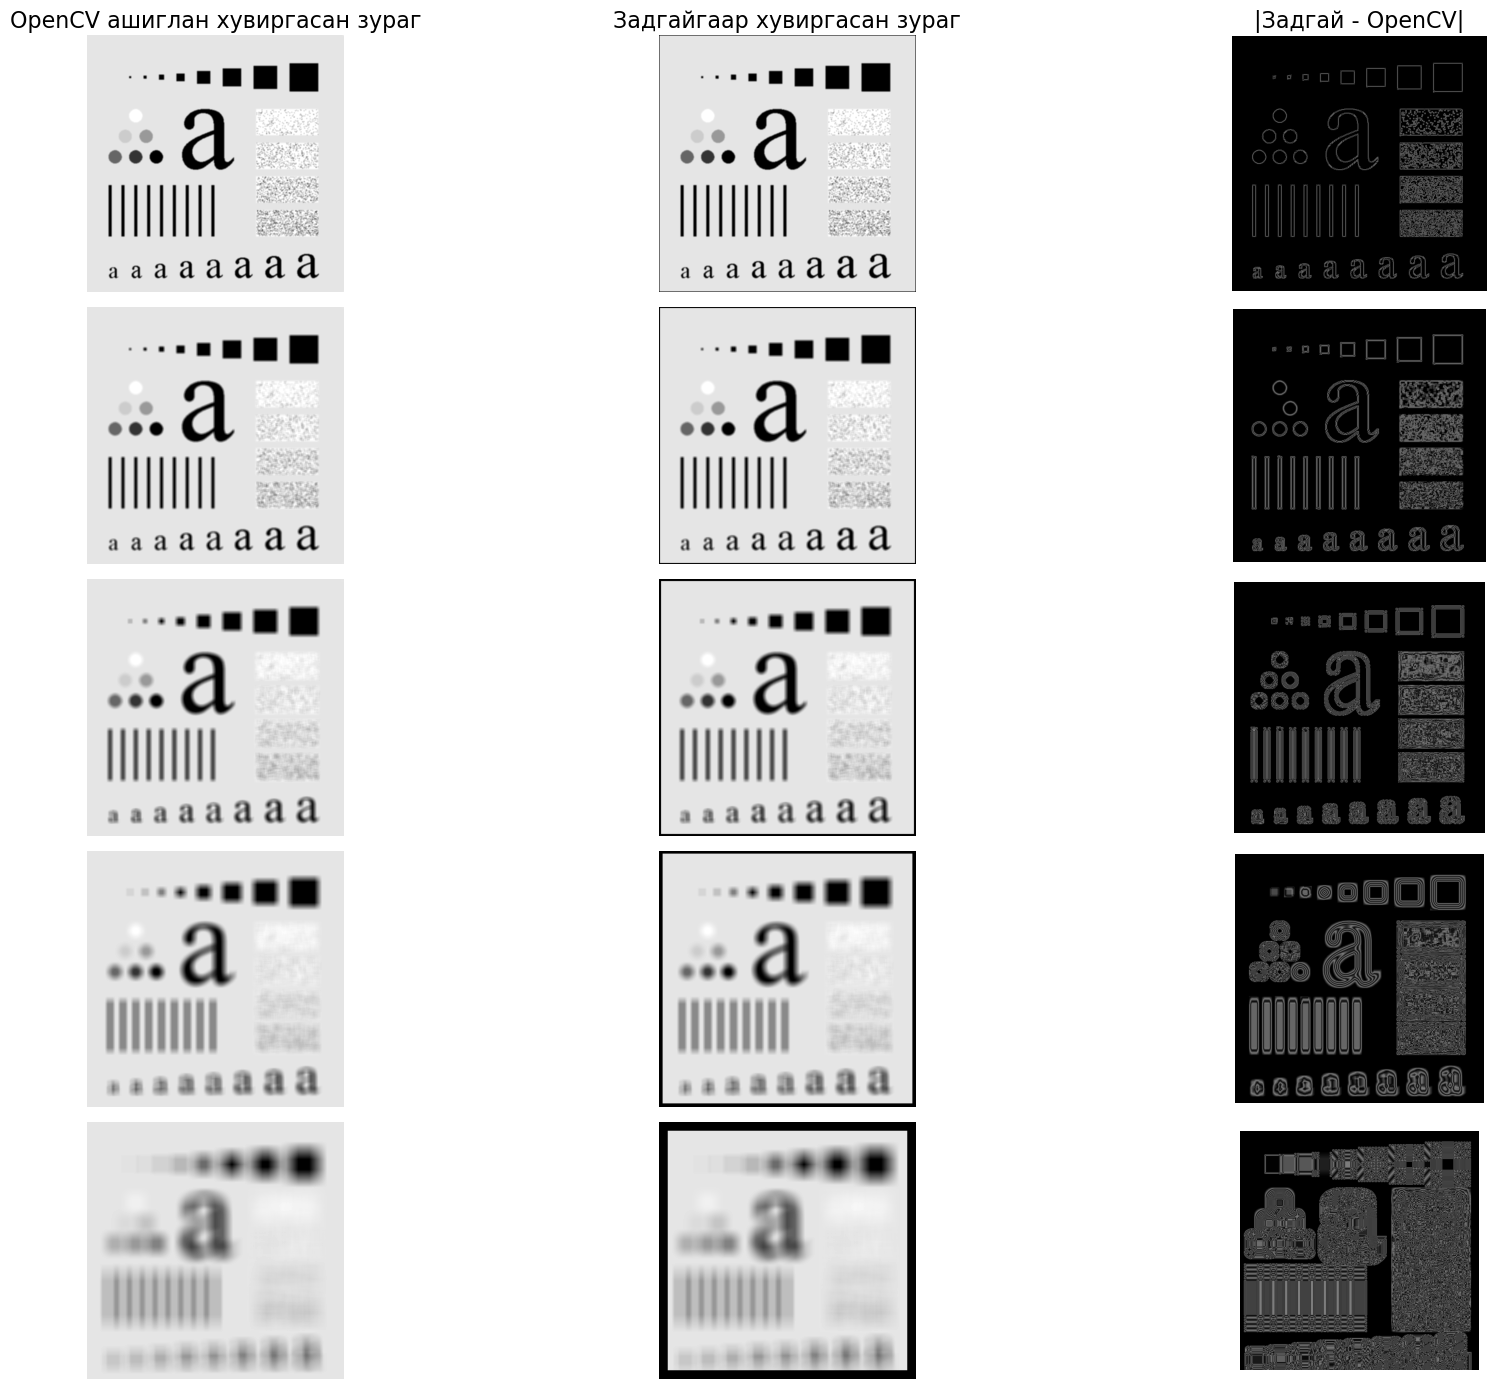

In [51]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 14))

for ind, kernel_size in enumerate(kernel_sizes):
    kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / (kernel_size ** 2)
    smoothed_image_cv = cv2.filter2D(img, -1, kernel)

    smoothed_image = smooth_img(img, kernel_size)

    axes[ind][0].imshow(smoothed_image_cv, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][1].imshow(smoothed_image, cmap = 'gray', vmin = 0, vmax = 255)
    img_diff = abs(smoothed_image - smoothed_image_cv)*255
    axes[ind][2].imshow(img_diff, cmap = 'gray', vmin = 0, vmax = 255)

    axes[ind][0].axis('off')
    axes[ind][1].axis('off')
    axes[ind][2].axis('off')

cols = ["OpenCV ашиглан хувиргасан зураг", "Задгайгаар хувиргасан зураг", "|Задгай - OpenCV|"]
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize = 16)

fig.tight_layout()
fig.savefig("./plots/smoothing_3.png")